# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
placement=pd.read_csv("train.csv")

In [3]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data preprocessing

In [4]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
placement_copy = placement.copy() 
print (placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB
None


In [5]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [6]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [7]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True) 
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Visualization

C:\Users\AKSHITA\AppData\Local\Temp\ipykernel_6848\2344573763.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


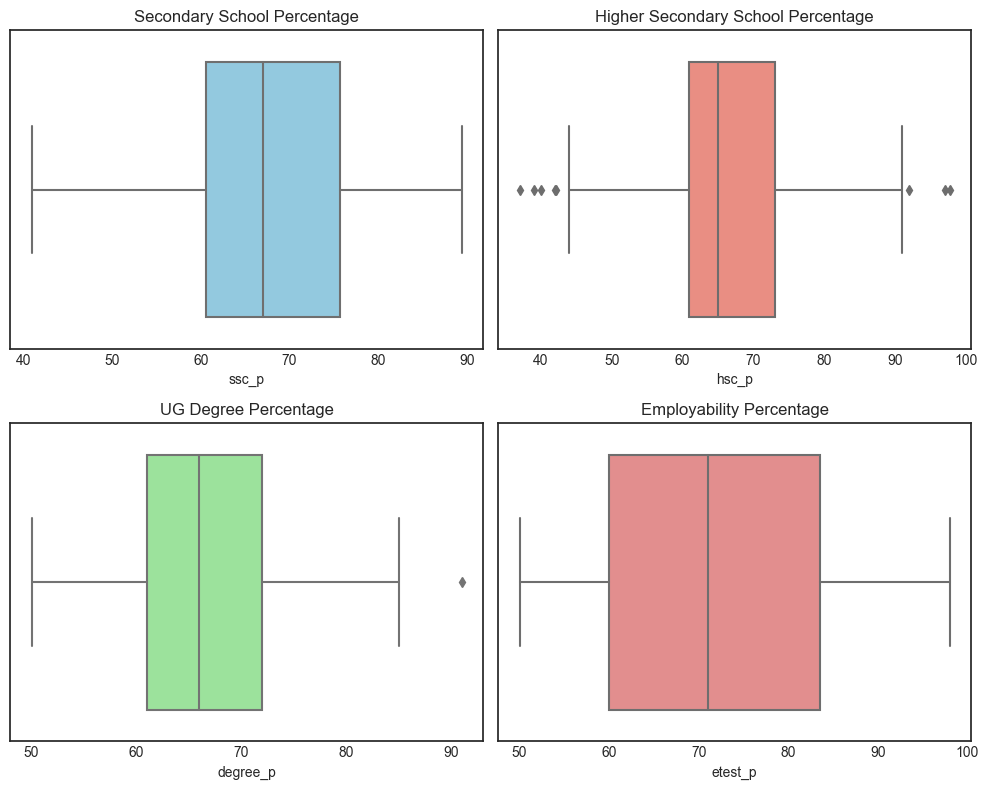

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
plt.style.use('seaborn-white')

# Create subplots with shared y-axis
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Boxplot for Secondary school percentage
sns.boxplot(x=placement_copy['ssc_p'], ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Secondary School Percentage')

# Boxplot for Higher Secondary school percentage
sns.boxplot(x=placement_copy['hsc_p'], ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Higher Secondary School Percentage')

# Boxplot for UG Degree percentage
sns.boxplot(x=placement_copy['degree_p'], ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('UG Degree Percentage')

# Boxplot for Employability percentage
sns.boxplot(x=placement_copy['etest_p'], ax=axs[1, 1], color='lightcoral')
axs[1, 1].set_title('Employability Percentage')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [9]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=placement_copy.loc[filter]

C:\Users\AKSHITA\AppData\Local\Temp\ipykernel_6848\1573687460.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


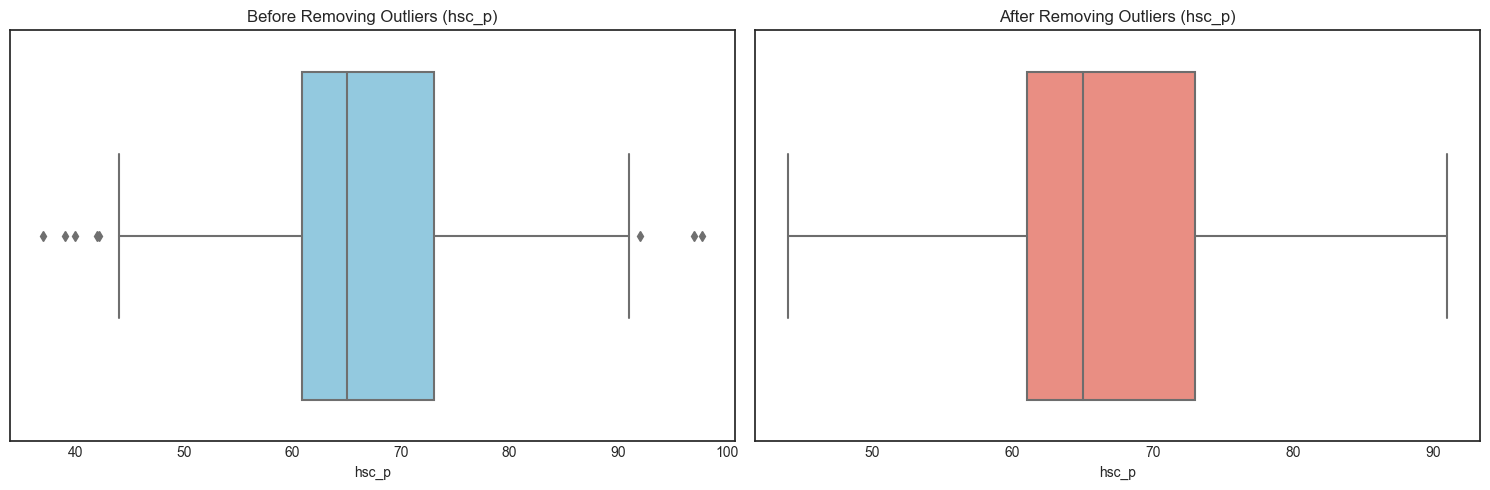

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
plt.style.use('seaborn-white')

# Create figure with specified size
plt.figure(figsize=(15, 5))

# Boxplot before removing outliers (hsc_p)
ax1 = plt.subplot(121)
sns.boxplot(x=placement_copy['hsc_p'], ax=ax1, color='skyblue')
ax1.set_title('Before Removing Outliers (hsc_p)')

# Boxplot after removing outliers (hsc_p)
ax2 = plt.subplot(122)
sns.boxplot(x=placement_filtered['hsc_p'], ax=ax2, color='salmon')
ax2.set_title('After Removing Outliers (hsc_p)')

# Adjust layout and display
plt.tight_layout()
plt.show()


C:\Users\AKSHITA\AppData\Local\Temp\ipykernel_6848\1584636066.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


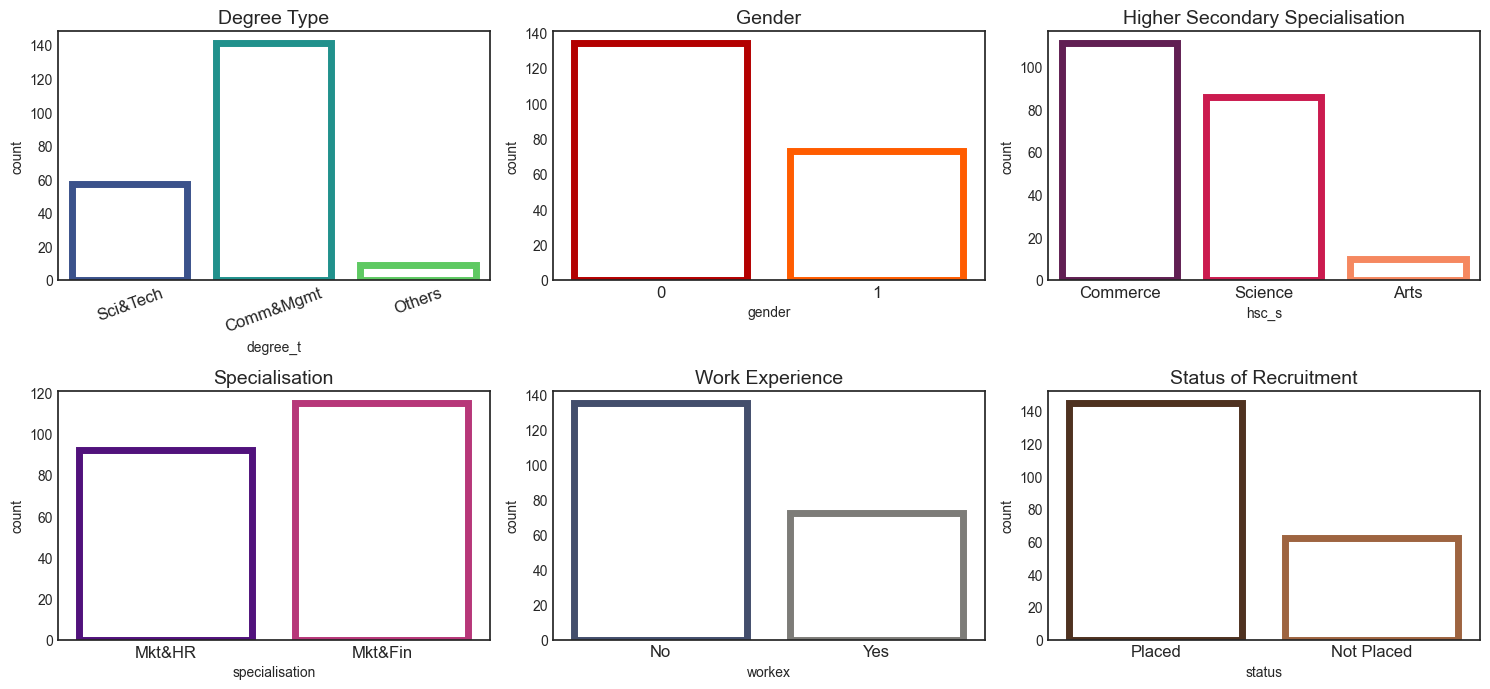

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('seaborn-white')

# Create the figure with specified size
fig, axs = plt.subplots(2, 3, figsize=(15, 7))

# Define color palettes for each plot
color_palettes = {
    'specialisation': sns.color_palette("magma", 3),
    'workex': sns.color_palette("cividis", 3),
    'degree_t': sns.color_palette("viridis", 3),
    'gender': sns.color_palette("hot", 3),
    'hsc_s': sns.color_palette("rocket", 3),
    'status': sns.color_palette("copper", 3)
}

# Plot Specialisation
sns.countplot(x="specialisation", data=placement_filtered, ax=axs[1, 0],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['specialisation'])
axs[1, 0].set_title('Specialisation', fontsize=14)
axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), fontsize=12)

# Plot Work Experience
sns.countplot(x="workex", data=placement_filtered, ax=axs[1, 1],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['workex'])
axs[1, 1].set_title('Work Experience', fontsize=14)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), fontsize=12)

# Plot Degree Type
sns.countplot(x="degree_t", data=placement_filtered, ax=axs[0, 0],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['degree_t'])
axs[0, 0].set_title('Degree Type', fontsize=14)
axs[0, 0].set_xticklabels(axs[0, 0].get_xticklabels(), fontsize=12, rotation=20)

# Plot Gender
sns.countplot(x="gender", data=placement_filtered, ax=axs[0, 1],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['gender'])
axs[0, 1].set_title('Gender', fontsize=14)
axs[0, 1].set_xticklabels(axs[0, 1].get_xticklabels(), fontsize=12)

# Plot Higher Secondary Specialisation
sns.countplot(x="hsc_s", data=placement_filtered, ax=axs[0, 2],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['hsc_s'])
axs[0, 2].set_title('Higher Secondary Specialisation', fontsize=14)
axs[0, 2].set_xticklabels(axs[0, 2].get_xticklabels(), fontsize=12)

# Plot Status of Recruitment
sns.countplot(x="status", data=placement_filtered, ax=axs[1, 2],
              facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=color_palettes['status'])
axs[1, 2].set_title('Status of Recruitment', fontsize=14)
axs[1, 2].set_xticklabels(axs[1, 2].get_xticklabels(), fontsize=12)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


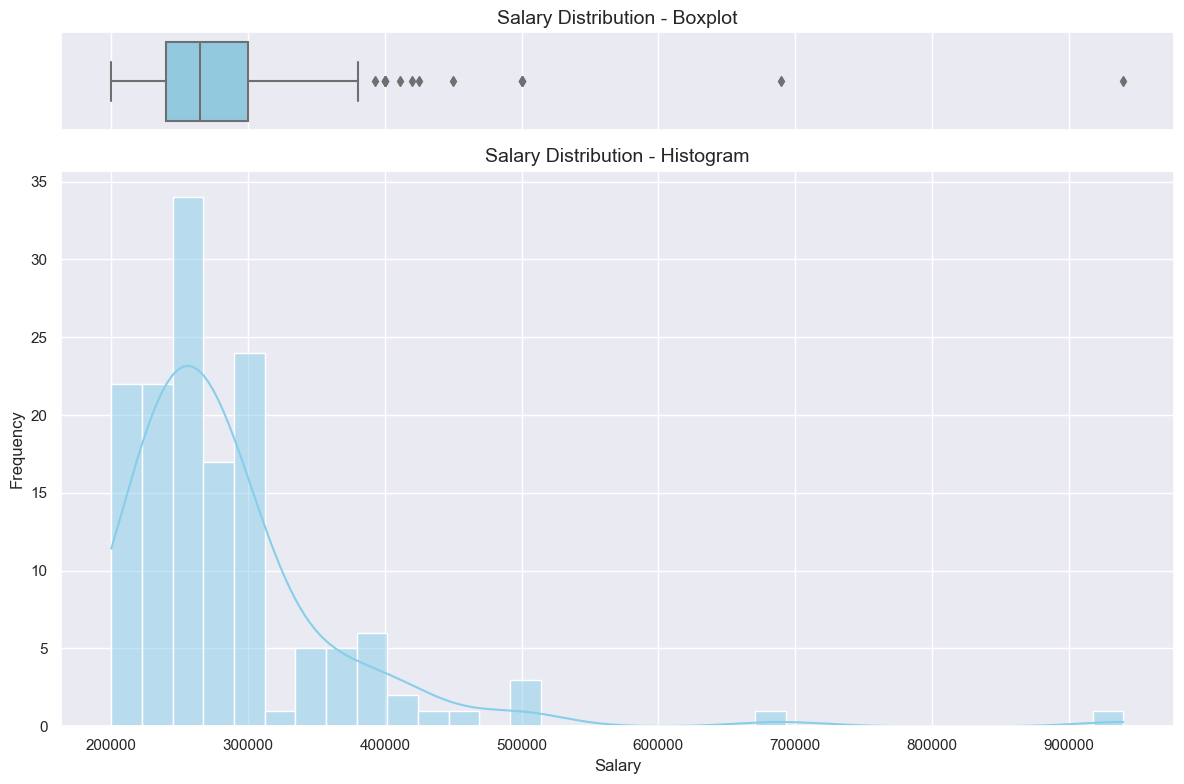

In [12]:
# Set figure size
sns.set(rc={'figure.figsize': (12, 8)})

# Create figure and subplots with shared x-axis and specified height ratios
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Filter out zero salary entries
placement_placed = placement_filtered[placement_filtered.salary != 0]

# Create boxplot for salary
sns.boxplot(x=placement_placed["salary"], ax=ax_box, color='skyblue', linewidth=1.5)
ax_box.set_title('Salary Distribution - Boxplot', fontsize=14)
ax_box.set_xlabel('')
ax_box.set_ylabel('')

# Create histogram for salary
sns.histplot(placement_placed["salary"], ax=ax_hist, color='skyblue', kde=True)
ax_hist.set_title('Salary Distribution - Histogram', fontsize=14)
ax_hist.set_xlabel('Salary')
ax_hist.set_ylabel('Frequency')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


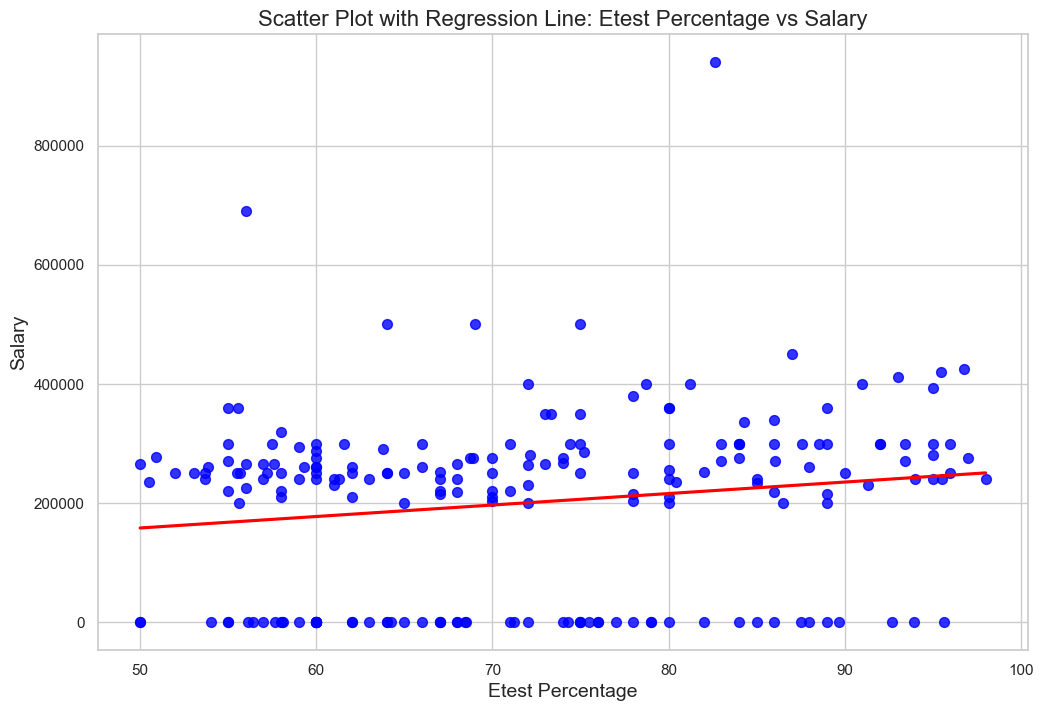

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create scatter plot with regression line
sns.regplot(
    x=placement_filtered["etest_p"], 
    y=placement_filtered["salary"], 
    scatter_kws={"s":50, "color":"blue"}, 
    line_kws={"color":"red"},
    ci=None
)

# Set titles and labels
plt.title('Scatter Plot with Regression Line: Etest Percentage vs Salary', fontsize=16)
plt.xlabel('Etest Percentage', fontsize=14)
plt.ylabel('Salary', fontsize=14)

# Display the plot
plt.show()


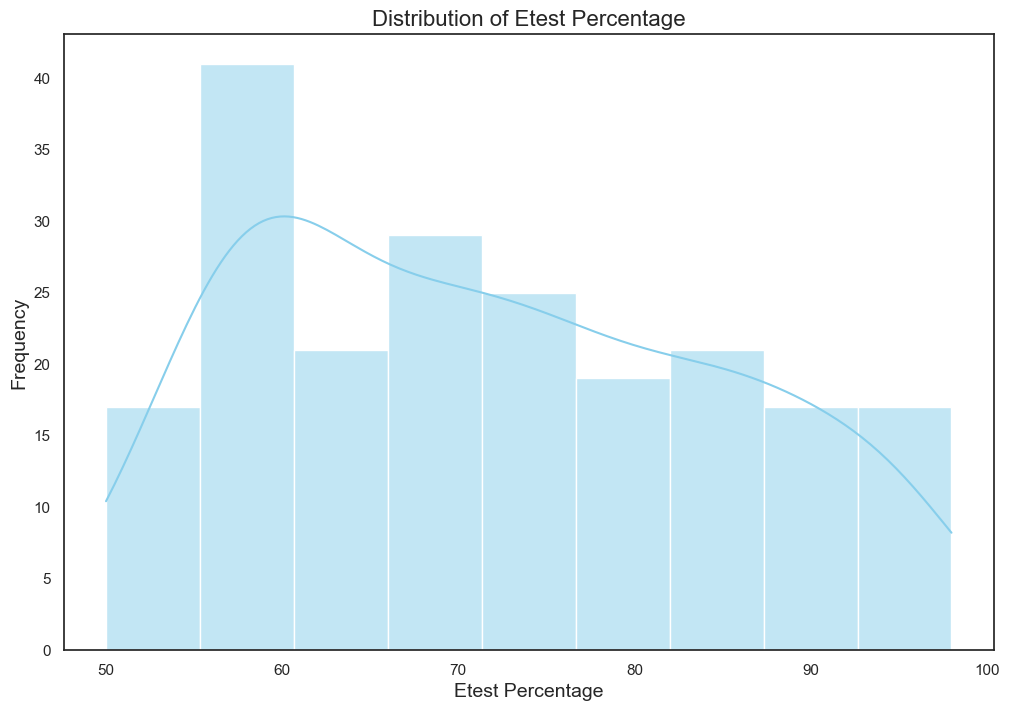

In [14]:
# Set the figure size and style
sns.set(rc={'figure.figsize': (12, 8)})
sns.set(style="white", color_codes=True)

# Create a histogram of 'etest_p'
sns.histplot(placement_filtered["etest_p"], kde=True, color="skyblue")

# Set title and labels for the plot
plt.title('Distribution of Etest Percentage', fontsize=16)
plt.xlabel('Etest Percentage', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.show()


C:\Users\AKSHITA\AppData\Local\Temp\ipykernel_6848\3778207343.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


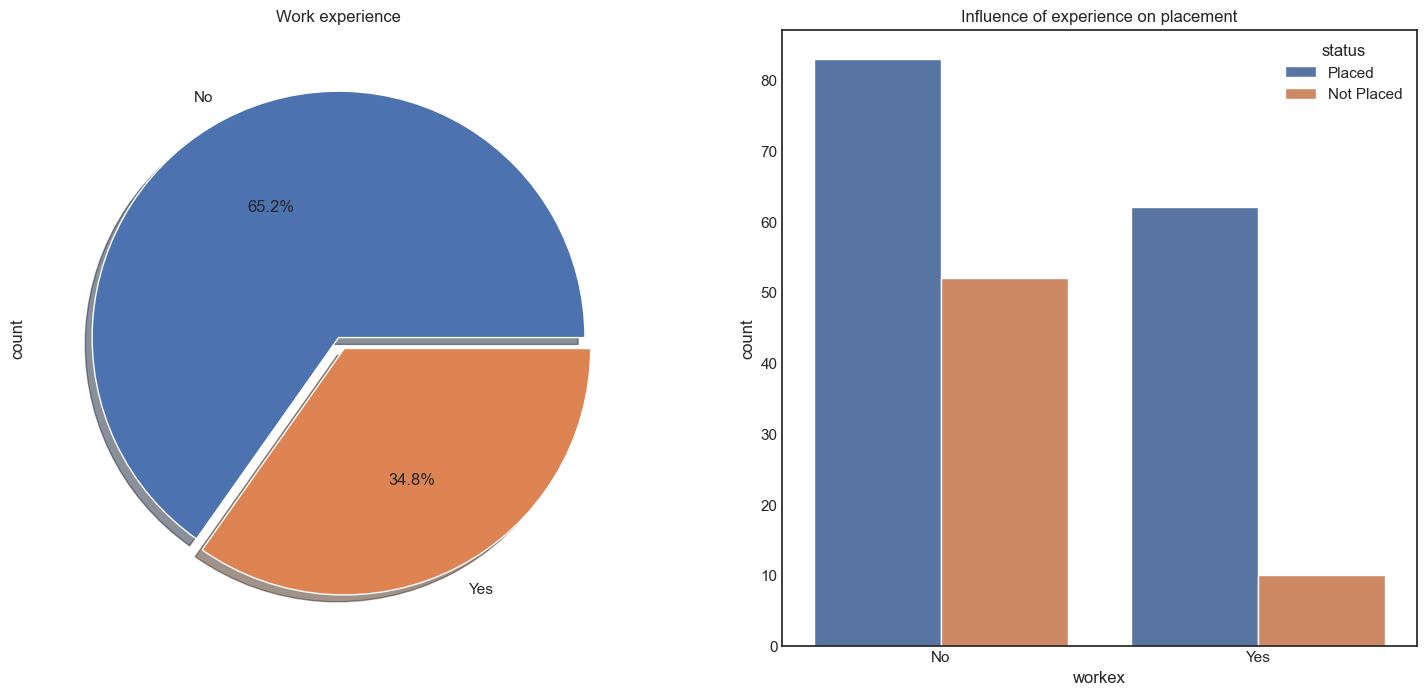

In [15]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()


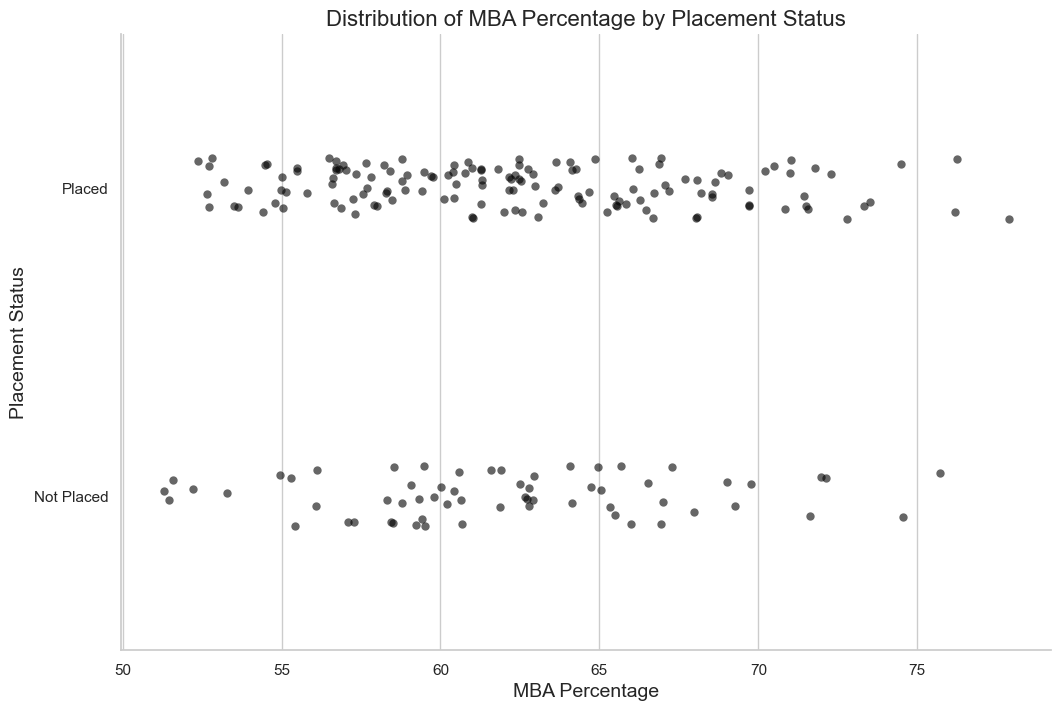

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Use "whitegrid" for a clean background

# Create a strip plot
ax = sns.stripplot(
    y="status", 
    x="mba_p", 
    data=placement_filtered,
    size=6, 
    color='black',
    jitter=True,  # Add jitter to avoid overlap
    alpha=0.6
)

# Customize plot
ax.set_title('Distribution of MBA Percentage by Placement Status', fontsize=16)
ax.set_xlabel('MBA Percentage', fontsize=14)
ax.set_ylabel('Placement Status', fontsize=14)
sns.despine()  # Remove top and right spines for a cleaner look

# Display the plot
plt.show()


In [18]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\AKSHITA\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [40]:
import plotly_express as px
gapminder=px.data.gapminder()
px.scatter(placement_filtered,x="mba_p",y="etest_p",color="status",facet_col="workex")

In [20]:
pip install plotly_express 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\AKSHITA\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
object_cols=['gender','workex','specialisation','status']

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    placement_filtered[col] = label_encoder.fit_transform(placement_filtered[col])
placement_filtered.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [22]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,0,67.00,91.00,58.00,0,55.0,1,58.80,1,False,True,False,False,False,True
1,0,79.33,78.33,77.48,1,86.5,0,66.28,1,False,False,True,False,False,True
2,0,65.00,68.00,64.00,0,75.0,0,57.80,1,True,False,False,True,False,False
3,0,56.00,52.00,52.00,0,66.0,1,59.43,0,False,False,True,False,False,True
4,0,85.80,73.60,73.30,0,96.8,0,55.50,1,False,True,False,True,False,False


# Model Selection

In [23]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [24]:
X=placement_coded.drop(['status'],axis=1)
y=placement_coded.status

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (165, 14)
Input Test: (42, 14)
Output Training: (165,)
Output Test: (42,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
from sklearn.metrics import classification_report
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 9  6]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.81      0.96      0.88        27

    accuracy                           0.83        42
   macro avg       0.86      0.78      0.80        42
weighted avg       0.84      0.83      0.82        42



In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Accuracy of DecisionTree Classifier:",metrics.accuracy_score(y_test, y_pred))

Accuracy of DecisionTree Classifier: 0.7380952380952381


In [29]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\AKSHITA\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("Accuracy of SVM:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy of SVM: 0.8333333333333334
Confusion Matrix:
 [[10  5]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.83      0.93      0.88        27

    accuracy                           0.83        42
   macro avg       0.83      0.80      0.81        42
weighted avg       0.83      0.83      0.83        42

